<h1>
    Table of Contents
    <span class="tocSkip">
    </span>
</h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Extraction-and-cleaning-the-data" data-toc-modified-id="Extraction-and-cleaning-the-data-1">
                    Extraction and Cleaning the data
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Extraction" data-toc-modified-id="Extraction-1.1">
                            Extraction
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Cleaning" data-toc-modified-id="Cleaning-1.2">
                            Cleaning
                        </a>
                    </span>
                    <ul class="toc-item">
                        <li>
                            <span>
                                <a href="#Out-of-range-values" data-toc-modified-id="Out-of-range-values-1.2.1">
                                    Out of range values
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#Checkins-at-(0,0)" data-toc-modified-id="Checkins-at-(0,0)-1.2.2">
                                    Checkins at (0,0)
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#NaN-values" data-toc-modified-id="NaN-values-1.2.3">
                                     NaN values
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#Duplicates" data-toc-modified-id="Duplicates-1.2.4">
                                     Duplicates
                                </a>
                            </span>
                        </li>
                        <li>
                            <span>
                                <a href="#Outliers-?" data-toc-modified-id="Outliers-?-1.2.5">
                                     Outliers?
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Replication-1" data-toc-modified-id="Replication-1-2">
                    Replication 1
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Paper-citation-1" data-toc-modified-id="Paper-citation-1-2.1">
                            Paper citation 1
                        </a>
                    </span>
                    <ul class="toc-item">
                        <li>
                            <span>
                                <a href="#Procedure-1" data-toc-modified-id="Procedure-1-2.1.1">
                                    Procedure 1
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#Step-1" data-toc-modified-id="Step-1-2.2">
                            Step 1
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Step-2" data-toc-modified-id="Step-2-2.3">
                            Step 2
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Step-3" data-toc-modified-id="Step-3-2.4">
                            Step 3 
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Step-4" data-toc-modified-id="Step-4-2.5">
                            Step 4 
                        </a>
                    </span>
                </li>
            </ul>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Replication-2" data-toc-modified-id="Replication-2-3">
                    Replication 2
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Paper-citation-2" data-toc-modified-id="Paper-citation-2-3.1">
                            Paper citation 2
                        </a>
                    </span>
                    <ul class="toc-item">
                        <li>
                            <span>
                                <a href="#Procedure-2" data-toc-modified-id="Procedure-2-3.1.1">
                                    Procedure 2
                                </a>
                            </span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span>
                        <a href="#Construction-of-$P_{data}$" data-toc-modified-id="Construction-of-$P_{data}$-3.2">
                            Construction of $P_{data}$
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Construction-of-$P_{null}$" data-toc-modified-id="Construction-of-$P_{null}$-3.3">
                            Construction of $P_{null}$
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Plot-figure-3(a)" data-toc-modified-id="Plot-figure-3(a)-3.4">
                            Plot figure 3(a)
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Plot-figure-3(b)" data-toc-modified-id="Plot-figure-3(b)-3.5">
                            Plot figure 3(b)
                        </a>
                    </span>
                </li>
            </ul>
        </li>
    </ul>
          
</div>

In [1]:
import pandas as pd
import numpy as np
from math import cos, sqrt, pi, atan2, sin
import matplotlib.pyplot as plt
from matplotlib import image
import ast

# Extraction and cleaning the data

## Extraction
In this part, I first extract the data from the data folder. All the files are compressed text documents. 

The checkins file contains the time and the location information of check-ins made by users and the edges ones the friendship network of respected app users.

In [2]:
data_folder = './data/'

brightkite_checkins_file = data_folder+'loc-brightkite_totalCheckins.txt.gz'
brightkite_edges_file = data_folder+'loc-brightkite_edges.txt.gz'

gowalla_checkins_file = data_folder+'loc-gowalla_totalCheckins.txt.gz'
gowalla_edges_file = data_folder+'loc-gowalla_edges.txt.gz'

#we specify that 
 # - the separator for all of them is \t,
 # - there is not specific header in the files 
 # - the compression used if 'gzip'
b_checkins = pd.read_csv(brightkite_checkins_file, sep = "\t", header=None,compression='gzip')
b_edges = pd.read_csv(brightkite_edges_file, sep = "\t", header=None,compression='gzip')
g_checkins = pd.read_csv(gowalla_checkins_file, sep = "\t", header=None,compression='gzip')
g_edges = pd.read_csv(gowalla_edges_file, sep = "\t", header=None,compression='gzip')

In [3]:
#we rename the columns of both Gowalla and Brightkite checkins files
b_checkins.columns = ['user', 'check-in time', 'latitude', 'longitude', 'location id']
g_checkins.columns = ['user', 'check-in time', 'latitude', 'longitude', 'location id']

In [4]:
#we rename the columns of both Gowalla and Brightkite edges files
b_edges.columns = ['user', 'friend']
g_edges.columns = ['user', 'friend']

In [5]:
b_checkins.head()

,user,check-in time,latitude,longitude,location id
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc


In [6]:
g_checkins.head()

,user,check-in time,latitude,longitude,location id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [7]:
b_edges.head()

,user,friend
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [8]:
g_edges.head()

,user,friend
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Cleaning


We say that a data is qualitative if it is valid, accurate, complet, consistent and uniform.

- To garantee that we have valid data we need to make sure that data is conform to the constraints.
- The accuracy of the data is defined as the degree to which the data is close to the true values.
- For the completeness, it is the degree to which all required data is known.
- The consistency of data is obvious.
- Finally the uniformity of the data makes sure that all the data is specified using the same unit of measure.

In a case where a data does not respect on of those requirement the best thing to do would be to re sample the data but in our case it is not possible, so I choose to not take into consideration data that do not follow one of those criteria.

So, for my data analysis I choose to not take into consideration the cases where :

- for a checkin, the latitude and the longitude are not in their supposed range, (not valid data)
- for a checkins, the longitude and the latitude are both equal to 0 because (not accurate data)
- the data is a NaN value (incomplete data)
- the duplicates data (not consistent data)
    
Note that, after looking at the data, I do feel like all the data is uniform. 

### Out of range values

#### Why remove the longitude or latitude of the checkin that are not in the range there are supposed to be ?

By definition, a longitude is an angle, in degree, in the range [-180;180], for the latitude is in the range [-90;90].

Clearly a value for either longitude or latitude outside of the supposed range is an error and such checkins must not be taken into consideration.

In [9]:
#I remove the unwanted in 2 steps for each dataset for more clarity

b_checkins = b_checkins[(b_checkins['longitude']>=-180)&(b_checkins['longitude']<=180)]
b_checkins = b_checkins[(b_checkins['latitude']>=-90)&(b_checkins['latitude']<=90)]

g_checkins = g_checkins[(g_checkins['longitude']>=-180)&(g_checkins['longitude']<=180)]
g_checkins = g_checkins[(g_checkins['latitude']>=-90)&(g_checkins['latitude']<=90)]

### Checkins at (0,0)

#### Why drop checkins at (0,0) ?

Searching on a map (0°,0°), I noticed that it is located in the middle of the Atlantique ocean. I assume that those checkins are measurement error because of the large amount of them as we are going to see below. Obviously, we cannot filter all the checkins to see if there are actually on a land but we can assume that 0 must have been the default value for the latitude and longitude and that those checkins were indeed measurement errors.

#### Why consider (0,0) ?

If there where just few of them we could have leave them where there are but the problem is that there a significant number of them. 

In [10]:
print(str(len(b_checkins[(b_checkins['longitude']==0)&(b_checkins['latitude']==0)])))
print(str(len(g_checkins[(g_checkins['longitude']==0)&(g_checkins['latitude']==0)])))

256137
135


In [11]:
print(str(b_checkins.shape))
print(str(g_checkins.shape))

(4747172, 5)
(6442863, 5)


In fact, it represents around 5.4 % of the Brightkite dataset, we must take that into account that is why I remove them.
For Gowalla, it represents less then 1% but as I said before we clearly know that it is not possible to have such a coordinates for a checkin, so I also remove those 135 checkins.

In [12]:
b_checkins = b_checkins[(b_checkins['longitude']!=0)|(b_checkins['latitude']!=0)]
g_checkins = g_checkins[(g_checkins['longitude']!=0)|(g_checkins['latitude']!=0)]

###  NaN values

#### Why drop the row with NaN values ?

By definition, NaN are non interpretable values, so by safety I choose to remove them from the studied datasets.

In [13]:
#to drop the row with NaN value(s) I simply call dropna() on the dataframes
b_checkins = b_checkins.dropna()
g_checkins = g_checkins.dropna()

b_edges = b_edges.dropna()
g_edges = g_edges.dropna()

### Duplicates

#### Why remove the duplicates values ?

If we did not remove the duplicates values we could have an undesirable effect of higher weight for the checkins that have duplicates. It is possible to have 2 differents checkins at the same location but not possible to have exactly the same checkin by the same user, at the same time, at the same longitude and latitude and with the same location id.

In [14]:
#to drop the duplicate(s) I simply call drop_duplicates() on the dataframes
b_checkins = b_checkins.drop_duplicates()
g_checkins=g_checkins.drop_duplicates()

### Outliers ?

I thought about removing the outliers (too much checkins per user or not enough) but after reading the paper one more time the authors say that they have 6.4 millions of checkins for Gowalla and 4.5 for Brightkite.

Now, if we look at the shape of our different dataframe I nearly have the same thing :

In [15]:
b_checkins.shape

(4451079, 5)

In [16]:
g_checkins.shape

(6442127, 5)

That is why I choose to let the data in this state.

In [17]:
b_checkins.head()

,user,check-in time,latitude,longitude,location id
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc


In [18]:
g_checkins.head()

,user,check-in time,latitude,longitude,location id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


# Replication 1 
## Paper citation 1

Check-in behavior of users. In the following sections we analyze spatial and social characteristics of user check-ins. We are
interested in understanding how far from their homes people tend to travel and how likely are they to meet social network friends at locations that they travel to. As user home locations are not explicitly given, we infer them by discretizing the world into 25 by 25km cells and defining the home location as the average position of check-ins in the cell with the most check-ins [29]. Manual inspection shows that this infers home locations with 85% accuracy.

First, we measure how far from their homes users tend to travel. Figure 1 plots the number of check-ins as a function of the distance from home for Brightkite, Gowalla and the cell phones. We observe that the distributions follow a power law with exponential cutoff in which there is an interesting kink at around 100km. The distribution decays faster for the travel of less than 100km and then flattens out for long distance jumps. We fit the power law parameters using maximum likelihood [3] and note a clear distinction in the power law exponents (1.7 vs 0.9) at around the 100km mark. Another interesting observation is that the distributions are extremely similar for all datasets. While Brightkite and Gowalla include check-ins from the whole world, cell phone data drops off quicker due to the small size of the country. 

The distinct change of the distribution at the 100km mark can be explained by the non-uniform population density. We calculate the distribution of distances between the homes of friends in Fig. 2(a) and observe a similar kink at around 100km, which shows that the probability of two friends living a certain distance away decreases quickly at first but then slows down after the distance between the homes increases above 100km.

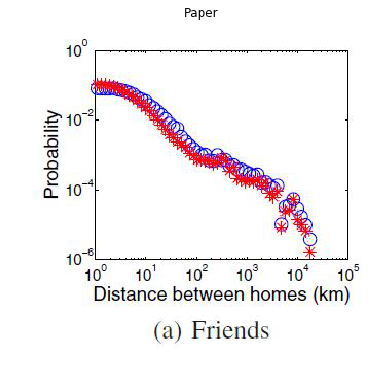

In [19]:
#plot of the image I want to replicate
fig, ax = plt.subplots(figsize=(6,6))

ax.set_title('Paper')
ax.set_axis_off()
img = image.imread('fig2a.jpg')
ax.imshow(img,aspect="auto")

### Procedure 1

From this citation I decided to structure the replication of the figure 2(a) as follows :

- Discretize the world in 25 by 25 km cells for the 2 datasets
- Determine the home for each users in each dataset
- Determine the distance between the home of 2 friends which frienship is specified in the edges dataset associated at the app
- Plot the distribution of the distances between the homes of 2 friends

## Step 1 

### Discretization of the world in 25 by 25 km cells

To do so, I simply obtain the result of the integer division of the latitude and longitude of each checkin by the conversion of 25 km in degree latitude degree and degree longitude degree.

By definition :

- for the latitude : 1° = 110.574 km
- for the longitude : 1° = 111.320*cos(latitude) km where the latitude is in degree

In [20]:
#conversion of 25 km in degree longitude and degree latitude

cell_size_deg_lat = 25/100.574
cell_size_deg_long = 25/(111.320*cos(cell_size_deg_lat))

In [21]:
def discretization(x,y) :
    """Returns corresponding cell for a longitude x and a latitude y 
    in a discretization of the world into 25 by 25km cells
    
    Parameters
    ----------
    x : float
        longitude degree of a checkin
    y : float
        latitude degree of a checkin
        
    Returns
    -------
    tuple
        coordinates of corresponding cell
    """
    
    #I hadded +180 and +90 to the longitude and latitude to be sure to have value superior or equal to 0
    return (x+180)//cell_size_deg_long, (y+90)//cell_size_deg_lat

In [22]:
def discretization_df(df) :
    """Assign for each checkin corresponding cell in discretization of the world
    
    Parameters
    ----------
    df : dataframe
        checkins for a particular dataset for which we assign particular cell for each checkin
    
    Returns
    -------
    dataframe
        Copy of original dataframe where one column containing corresponding cell has been added
    """
    
    temp = df.copy()
    temp.loc[:,'cell'] =df.apply(lambda row : discretization(row['longitude'], row['latitude']), axis = 1)
    return temp.copy()

This way of doing with a temporary dataframe and the function `discretization_df` was mandatory otherwise Python would rise the following warning : `SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead `

In [23]:
b_cells_checkins = b_checkins[["user", 'check-in time', 'latitude', 'longitude']]
b_cells_checkins= discretization_df(b_cells_checkins)

g_cells_checkins = g_checkins[["user", 'check-in time', 'latitude', 'longitude']]
g_cells_checkins= discretization_df(g_cells_checkins)

In [24]:
b_cells_checkins.head()

,user,check-in time,latitude,longitude,cell
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,"(323.0, 521.0)"
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,"(323.0, 522.0)"
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,"(323.0, 522.0)"
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,"(323.0, 521.0)"
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,"(323.0, 521.0)"


In [25]:
g_cells_checkins.head()

,user,check-in time,latitude,longitude,cell
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,"(354.0, 483.0)"
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,"(354.0, 483.0)"
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,"(354.0, 483.0)"
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,"(354.0, 483.0)"
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,"(355.0, 483.0)"


## Step 2 

### Determine the home of each user 

We can consider that the home of a user is contained in the cell with the most checkins.
We take as the exact coordinate of the home the mean of the longitude and latitude of all the checkins in this particular cell.

In [26]:
# this function take as argument a dataframe whose columns must at least contain 'user', 'cell', 'latitude' and 'longitude'
    # return the dataframe of the home of the user in the dataframe passed as argument

def home (df) :
    """Determine home for each user of the checkins dataframe
    
    Parameters
    ----------
    df : dataframe
        checkins with cells for which we compute the home for each user
    
    Returns
    -------
    dataframe
        a dataframe containing for each user their supposed home
    """
    
    #we make a copy to make sure we do not alterate the original dataframe
    home = df.copy()
    
    home['count'] = 0
    
    # aggregate the function count in the count column and mean in the latitude and longitude columns
    # the count column contains the number of checkins for each possible pair ['user', 'cell'] possible for each user
    # the latitude column contains the mean of all the latitudes of all the checkins for each possible pair ['user', 'cell']
    # the longitude column contains the mean of all the longitudes of all the checkins for each possible pair ['user', 'cell']
    home= home.groupby(['user', 'cell']).agg({'count' : 'count', 'latitude' : 'mean', 'longitude':'mean'})
    home = pd.DataFrame(home)
    
    # I selected for each user the cells with the most checkins
    # this row will be considered as the cell of the home of the user
    idx = home.groupby(['user'])['count'].transform(max) == home['count']
    return home[idx]

In [27]:
home_b = home(b_cells_checkins)

home_g = home(g_cells_checkins)

In [28]:
home_b.head()

,,count,latitude,longitude
user,cell,,,
0,"(323.0, 522.0)",731,39.821451,-105.038133
1,"(248.0, 513.0)",1073,37.603702,-122.383366
2,"(323.0, 522.0)",900,39.802665,-105.046640
3,"(248.0, 513.0)",786,37.679735,-122.408389
4,"(884.0, 604.0)",377,60.173672,24.942450


In [29]:
home_g.head()

count   latitude  longitude
user cell                                       
0    (354.0, 483.0)    107  30.259471 -97.755253
1    (773.0, 543.0)      1  45.202484  -0.746831
     (786.0, 558.0)      1  48.863379   2.333329
     (789.0, 556.0)      1  48.419669   3.016968
     (791.0, 564.0)      1  50.381005   3.430710

When looking at the `head()` of the `home_g` dataframe we notice one problem : which cells can be considered cell can be considered home when there are more than one cell with the most checkins per user. The same problem can be encountered in the `home_b` dataframe. 

First there could be those scenarios :
- all the potential home cells are side by side and then the home must be at the limit between all of them or there are far away from each other. 
- all the potential home cells are far away from each other.

I tought of two solutions :
- we take the first cell appearing in the dataframe to be the home cell.
- we take the mean of all the cells with the maximum number of checkins in a cell to be the home cell.

Moreover, I deduced that the second scenario is less likely to occur because in the cleaning part of the data I considered only the users with a reasonably amount of checkins thus this scenario has a lower probability to occur, in my opinion.

That is why I choose the second option of taking the mean :

In [30]:
home_b = home_b.groupby(['user']).agg('mean')
home_b['cell']= home_b.apply(lambda row : discretization(row['longitude'], row['latitude']), axis = 1)

home_g = home_g.groupby(['user']).agg('mean')
home_g['cell']= home_g.apply(lambda row : discretization(row['longitude'], row['latitude']), axis = 1)

In [31]:
home_b.head()

,count,latitude,longitude,cell
user,,,,
0,731,39.821451,-105.038133,"(323.0, 522.0)"
1,1073,37.603702,-122.383366,"(248.0, 513.0)"
2,900,39.802665,-105.046640,"(323.0, 522.0)"
3,786,37.679735,-122.408389,"(248.0, 513.0)"
4,377,60.173672,24.942450,"(884.0, 604.0)"


In [32]:
home_g.head()

,count,latitude,longitude,cell
user,,,,
0,107,30.259471,-97.755253,"(354.0, 483.0)"
1,1,47.204338,4.499703,"(796.0, 551.0)"
2,643,37.858725,-122.258182,"(249.0, 514.0)"
4,147,37.786486,-122.411798,"(248.0, 514.0)"
5,26,30.278072,-97.722569,"(355.0, 483.0)"


## Step 3 

### Determine the distance between the home of two friends

I started by adding the exact coordinates of the respective homes for the user and the friend to the edge dataframes of each corresponding dataset.

In [33]:
home_b = home_b.reset_index()
home_g = home_g.reset_index()

b_distance_friends = b_edges.copy()
g_distance_friends = g_edges.copy()

In [34]:
#I used a left merge on 'user' the first time and on 'friend' the second one

b_distance_friends = pd.merge(b_distance_friends, home_b[['user','longitude', 'latitude']], on = 'user', how = 'left')
b_distance_friends.columns = ['user', 'friend', 'u_longitude', 'u_latitude']

b_distance_friends = pd.merge(b_distance_friends, home_b[['user','longitude', 'latitude']].set_index('user'), 
                              left_on = 'friend', right_index= True, how = 'left')
b_distance_friends.columns = ['user', 'friend', 'u_longitude', 'u_latitude', 'f_longitude', 'f_latitude']


g_distance_friends = pd.merge(g_distance_friends, home_g[['user','longitude', 'latitude']], on = 'user', how = 'left')
g_distance_friends.columns = ['user', 'friend', 'u_longitude', 'u_latitude']

g_distance_friends = pd.merge(g_distance_friends, home_g[['user','longitude', 'latitude']].set_index('user'), 
                              left_on = 'friend', right_index= True, how = 'left')
g_distance_friends.columns = ['user', 'friend', 'u_longitude', 'u_latitude', 'f_longitude', 'f_latitude']

Now I declared various methods to help me compute the distance between the user and the friend for each edge of the `edges` dataframes

In [35]:
def distance(u_lat, u_long, f_lat, f_long) :
    """ Determine the distance between the position of a user and the position of his friend
    
    Parameters
    ----------
    u_lat float
        Latitude of the user's position
    u_long float
        Longitude of the user's position
    f_lat float
        Latitude of the friend's position
    f_long float
        Longitude of the friend's position
    
    Returns
    -------
    float
        the distance in km between the user's home and the friend's home
    """
    p = pi/180
    a = sin((u_lat-f_lat)*p/2)**2 + cos(f_lat*p) * cos(u_lat*p)*(sin((u_long-f_long)*p/2)**2)
    return (6371*2*atan2(sqrt(a), 1-sqrt(a)))

In [36]:
def distance_df (df) :
    """Assign for each edges the distance between the user and the friend of the edge
    
    Parameters
    ----------
    df : dataframe
        edges dataframe for particular dataset for which we want to determine the distance between 
        the user and the friend for each edge
    
    Returns
    -------
    dataframe
        Copy of original dataframe where one column containing the distance has been added
    """
    temp = df.copy()
    temp.loc[:,'distance'] =df.apply(
        lambda row : distance(row.u_latitude,row.u_longitude, row.f_latitude, row.f_longitude), axis = 1)
    return temp.copy()

Once again, this way of doing with a temporary copied dataframe was mandatory otherwise Python would rise the following warning : `SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead `

In [37]:
b_distance_friends = distance_df(b_distance_friends)
g_distance_friends = distance_df(g_distance_friends)

In [38]:
b_distance_friends.head()

,user,friend,u_longitude,u_latitude,f_longitude,f_latitude,distance
0,0,1,-105.038133,39.821451,-122.383366,37.603702,1714.050733
1,0,2,-105.038133,39.821451,-105.046640,39.802665,2.212136
2,0,3,-105.038133,39.821451,-122.408389,37.679735,1714.064977
3,0,4,-105.038133,39.821451,24.942450,60.173672,12210.486826
4,0,5,-105.038133,39.821451,-122.387135,37.634916,1713.353175


In [39]:
g_distance_friends.head()

,user,friend,u_longitude,u_latitude,f_longitude,f_latitude,distance
0,0,1,-97.755253,30.259471,4.499703,47.204338,12871.811798
1,0,2,-97.755253,30.259471,-122.258182,37.858725,2887.110918
2,0,3,-97.755253,30.259471,NaN,NaN,NaN
3,0,4,-97.755253,30.259471,-122.411798,37.786486,2903.110763
4,0,5,-97.755253,30.259471,-97.722569,30.278072,3.760178


## Step 4 

### Plot the distribution of the home distances between friends 

In this final part, I am going to plot the distribution of home distances between friends.
To do so, I compute the histogram of the distribution of column `distance` of our 2 `distance_friends` datasets. Note that I enable the parameter density to **True** because we want the value of the probability density function at the bin. I also pass as argument for the bins a list of number spaced evenly on a log scale.

In [40]:
def loghist_vals_bins (x, max_bins) :
    """ Compute the density histogram of the x values using logarithmic bins
    
    Parameter
    ---------
    x : Series
        All the values that we need to compute the histogram of
    max_bins : int
        The number of bins we pass as parameter to our np.histogram function
        
    Return
    ------
    array 
        Values of the histogram
    array of dtype float 
        Bin edges
    """
    return np.histogram(x, bins = np.logspace(0, np.log10(x.max()), max_bins), density = True)

In [41]:
b_values, b_bins = loghist_vals_bins(b_distance_friends['distance'],100)
g_values, g_bins = loghist_vals_bins(g_distance_friends['distance'],100)

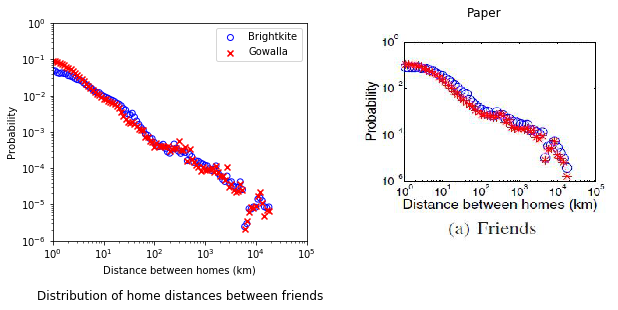

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

#I set the parameter facecolor to none to have empty circle like in the original figure 
ax[0].scatter(b_bins[:-1], b_values, marker = 'o', label = 'Brightkite', color = 'b', facecolor = 'none')
ax[0].scatter(g_bins[:-1], g_values, marker = 'x', label = 'Gowalla', color = 'r')

#as in the original figure I set the axis scales to 'log'
ax[0].loglog(True)

#I also set the limits of both axis to correspond to the limits of the original image
ax[0].set_ylim([10**(-6), 10**(0)])
ax[0].set_xlim(10**0, 10**5)

ax[0].legend()

#I set the name of the axis
ax[0].set_xlabel('Distance between homes (km)')
ax[0].set_ylabel('Probability')

#I set the name of the whole subplot
ax[0].set_title("Distribution of home distances between friends", y=-0.3)

#I plot the original figure next to what I obtained
ax[1].set_title('Paper')
ax[1].set_axis_off()
img = image.imread('fig2a.jpg')
ax[1].imshow(img,aspect="auto")

In conclusion, the replication seems pretty accurate. However, I can point out that comparing to the original :
 - my slopes do not seems to start as close from one another as the original.
 - in the range x=[10^0, 10^2] my data is not as curved as the original. On the other hand, in this range, as in the original the probabilities of the Brightkite dataset seems higher than the ones of the Gowalla dataset.
 - the kink at around 100km that the authors pointed out in the paper is also visible in my replication.
 - similarly, we can clearly notice the same behavior in the range x = [10^3.5, 10^4] where for both plots : the probabilities fall drastically before going up again.
 - one last small difference can be seen when x>10^4 : in fact, we notive in both cases the probabilities start to diminish again but they disminish more in the original plot than in mine.
 
To conclude, we can say that the important parts of my replication are the same as the ones noticeable in the original plot even though some little details differ (how the slopes start and end) compared to the original.  

# Replication 2

## Paper citation 2

Moving close to a friend’s home. We begin by investigating the sociability of human movement by measuring how likely is person
A to travel close to the home of her friend B. We aim to understand how the location of A’s friend B affects movement of A. We ex- amine the fraction of check-ins that are in the vicinity of B’s home. Intuitively we expect that people are more likely to move to a place in which they have friends, and that this likelihood decreases as the distance of travel increases. So far we saw that most of our friends live geographically close to us, and thus we would expect that they impact our movement the most. However, as we will see later, this is not the case. 

To quantify this effect we proceed as follows. We say that user A “visits” her friend B if A checks-in within radius r of B’s home, and we aim to compute $P_{data}(d)$, which measures the probability that A visits a friend given that A travels distance d from home. Quantity $P_{data}(d)$ is simply the fraction of A’s check-ins at distance d from her home that occur in radius r (we set r = 25km) of  one of A’s friends. We experimented with various values of r and observed consistent behaviors. 

Solid lines in Figure 3(a) plot $P_{data}(d)$, the fraction of friend visiting check-ins as a function of the distance traveled from home. Notice that both Gowalla and Brightkite exhibit similar behavior in that the probability of visiting a friend’s home levels off to a  value of 0.3 after the 100km mark. This means that if a user travels more than 100km from her home, then there is a 30% chance that they will jump close to an existing friend’s home. Moreover, we observe that the probability of visiting a friend’s home remains constant after the 100km mark. The number of possible locations one can visit increases with the distance, and the number of friends decreases with the distance as well. This suggests that the probability of visiting a friend would decrease with the distance traveled (more possible locations to visit and less friends, and thus smaller probability of visiting a friend). Interestingly, we observe that the probability of visiting a friend remains constant as a function of distance traveled. We consider this surprising as it suggests that the effect friends have on the our movement grows with their distance from us. To more precisely establish this we next compare the effect of friends on our movement to a null model that ignores the social network structure, and we then establish a causal relationship between the social network and mobility. 

We compare the fraction of friend visiting check-ins $P_{data}(d)$ to a null model, $P_{null}(d)$, which quantifies the probability that a friend will be within the vicinity of a user if the user would travel “randomly”. We consider the case where the user moves randomly with respect to the overall population density and measure the probability that a user travels to the vicinity of her friend’s home. We plot $P_{null}(d)$ in Figure 3(a) using dashed lines, and (as expected) we observe a strong monotonic decrease. This means if people traveled independent of the network structure (but according to the overall population density) then the farther away they move from home the less likely they are to visit a friend’s home. Additionally, in Fig. 3(b) we compare the real data with the null model to quantify the relative effect of friends on a user’s movement. We observe that the actual influence of a friend on a user making a long distance jump increases with the distance. For example, the relative influence of a friend who lives 1,000km away is 10 times greater than the influence of a friend who lives 40km away. We also considered a version of the null model where users travel the exact same distance from home as in the real data but in a random direction. In this case we observe an even stronger effect of the social network on human mobility.

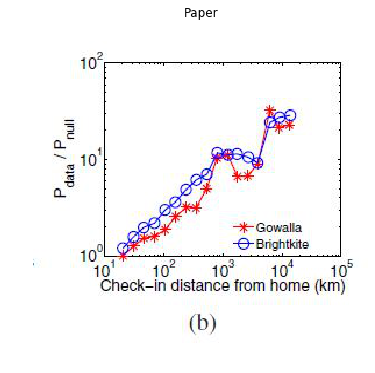

In [43]:
#plot of the image I want to replicate
fig, ax = plt.subplots(figsize=(6,6))

ax.set_title('Paper')
ax.set_axis_off()
img = image.imread('fig3b.jpg')
ax.imshow(img,aspect="auto")

### Procedure 2

To be able to replicate the figure above, I am going to start by replicating the the probability that a user will travel to a friend's home as function of distance traveled. That is the figure 3 (a) :

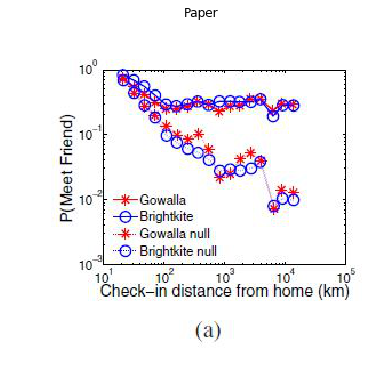

In [44]:
#plot of the image I want to replicate
fig, ax = plt.subplots(figsize=(6,6))

ax.set_title('Paper')
ax.set_axis_off()
img = image.imread('fig3a.jpg')
ax.imshow(img,aspect="auto")

The steps of this replication are going to be :
- Construction of $P_{data}$
- Construction of $P_{null}$
- Plot figure 3(a)
- Plot figure 3(b)

But first the main data I am going to work on as a base are going to be dataframes where we have for each user the location of the checkins and the number of times this same user have checked at this location.

In [45]:
b_user_checkins = b_checkins[['user', 'latitude', 'longitude', 'location id']].copy().groupby(
    ['user', 'latitude', 'longitude']).agg({'location id' : 'count'}).reset_index()
b_user_checkins.columns = ['user', 'latitude', 'longitude', 'nber_checkins']

g_user_checkins = g_checkins[['user', 'latitude', 'longitude', 'location id']].copy().groupby(
    ['user', 'latitude', 'longitude']).agg({'location id' : 'count'}).reset_index()
g_user_checkins.columns = ['user', 'latitude', 'longitude', 'nber_checkins']

In [46]:
b_user_checkins.head()

,user,latitude,longitude,nber_checkins
0,0,29.986862,-95.350611,3
1,0,30.131289,-98.011794,2
2,0,30.194444,-97.670000,1
3,0,30.202231,-97.667128,2
4,0,30.233282,-97.741997,2


In [47]:
g_user_checkins.head()

,user,latitude,longitude,nber_checkins
0,0,30.201557,-97.667127,4
1,0,30.213861,-97.769415,1
2,0,30.231375,-97.797455,1
3,0,30.231650,-97.800171,1
4,0,30.234214,-97.757571,1


## Construction of $P_{data}$

The steps to construct $P_{data}$  are :
- compute the distance between the house of the user and his checkin.
- verify if the checkin was made at less than 25km than the home of one of the user's friend.
- compute the $P_{data}$ values and bins.

### Compute the distance between the house of the user and his checkin

I start by assigning to each user his home location.

In [48]:
b_distance = pd.merge(b_user_checkins, home_b[['user', 'latitude', 'longitude']], on='user').copy()
b_distance.columns = ['user', 'latitude', 'longitude','nber_checkins', 'home_lat', 'home_long']

g_distance = pd.merge(g_user_checkins, home_g[['user', 'latitude', 'longitude']], on='user').copy()
g_distance.columns = ['user', 'latitude', 'longitude','nber_checkins', 'home_lat', 'home_long']

I now compute the distance for each row between the location of the checkin and the location of the house for the corresponding user.

In [49]:
b_distance['distance'] = b_distance[['latitude', 'longitude', 'home_lat', 'home_long']].apply(
    lambda x : distance(x.latitude, x.longitude, x.home_lat, x.home_long), axis = 1)
g_distance['distance'] = g_distance[['latitude', 'longitude', 'home_lat', 'home_long']].apply(
    lambda x : distance(x.latitude, x.longitude, x.home_lat, x.home_long), axis = 1)

In [50]:
b_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance
0,0,29.986862,-95.350611,3,39.821451,-105.038133,1566.229493
1,0,30.131289,-98.011794,2,39.821451,-105.038133,1380.879940
2,0,30.194444,-97.670000,1,39.821451,-105.038133,1392.990745
3,0,30.202231,-97.667128,2,39.821451,-105.038133,1392.250420
4,0,30.233282,-97.741997,2,39.821451,-105.038133,1384.281016


In [51]:
g_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance
0,0,30.201557,-97.667127,4,30.259471,-97.755253,10.646219
1,0,30.213861,-97.769415,1,30.259471,-97.755253,5.253038
2,0,30.231375,-97.797455,1,30.259471,-97.755253,5.120041
3,0,30.231650,-97.800171,1,30.259471,-97.755253,5.311388
4,0,30.234214,-97.757571,1,30.259471,-97.755253,2.817851


We consider that a person is home if a checkin for a user has been made less than 25 km away from his home.

In [52]:
b_distance = b_distance[~(b_distance['distance']<=25)]
g_distance = g_distance[~(g_distance['distance']<=25)]

### Verify if the checkin was made at less than 25km than the home of one of the user's friend

To verify such a condition we need to go through the home of every friend of the user. That is why to help the computation I am adding a column to the dataframe containing all the homes of the user's friend on each row.

In [53]:
# Transformation of columns latitude and longitude into a tuple
homes_b_tuples = home_b[['user', 'latitude', 'longitude']].copy()
homes_b_tuples['home_tuple'] = homes_b_tuples[['latitude', 'longitude']].apply(tuple, axis = 1)

homes_g_tuples = home_g[['user', 'latitude', 'longitude']].copy()
homes_g_tuples['home_tuple'] = homes_g_tuples[['latitude', 'longitude']].apply(tuple, axis = 1)

# Merging edges dataframes with the homes of the friends
b_edges_w_fhome = pd.merge(
    b_edges, homes_b_tuples[['user', 'home_tuple']], left_on=['friend'], right_on=['user'])
b_edges_w_fhome=b_edges_w_fhome[['user_x', 'friend', 'home_tuple']]
b_edges_w_fhome.columns = ['user', 'friend', 'home_friend']

g_edges_w_fhome = pd.merge(
    g_edges, homes_g_tuples[['user', 'home_tuple']], left_on=['friend'], right_on=['user'])
g_edges_w_fhome=g_edges_w_fhome[['user_x', 'friend', 'home_tuple']]
g_edges_w_fhome.columns = ['user', 'friend', 'home_friend']

In [54]:
b_edges_w_fhome.head()

,user,friend,home_friend
0,0,1,"(37.6037019972043, -122.38336624790443)"
1,3,1,"(37.6037019972043, -122.38336624790443)"
2,4,1,"(37.6037019972043, -122.38336624790443)"
3,5,1,"(37.6037019972043, -122.38336624790443)"
4,7,1,"(37.6037019972043, -122.38336624790443)"


In [55]:
g_edges_w_fhome.head()

,user,friend,home_friend
0,0,1,"(47.20433821210833, 4.499702613825)"
1,2,1,"(47.20433821210833, 4.499702613825)"
2,9,1,"(47.20433821210833, 4.499702613825)"
3,52,1,"(47.20433821210833, 4.499702613825)"
4,53,1,"(47.20433821210833, 4.499702613825)"


I now add a new column to my main dataframe with the homes of all of the users' friends .

In [56]:
b_distance = pd.merge(b_distance, b_edges_w_fhome.groupby('user').agg({'home_friend' : tuple}), on ='user')

g_distance = pd.merge(g_distance, g_edges_w_fhome.groupby('user').agg({'home_friend' : tuple}), on ='user')

In [57]:
b_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend
0,0,29.986862,-95.350611,3,39.821451,-105.038133,1566.229493,"((37.6037019972043, -122.38336624790443), (39...."
1,0,30.131289,-98.011794,2,39.821451,-105.038133,1380.879940,"((37.6037019972043, -122.38336624790443), (39...."
2,0,30.194444,-97.670000,1,39.821451,-105.038133,1392.990745,"((37.6037019972043, -122.38336624790443), (39...."
3,0,30.202231,-97.667128,2,39.821451,-105.038133,1392.250420,"((37.6037019972043, -122.38336624790443), (39...."
4,0,30.233282,-97.741997,2,39.821451,-105.038133,1384.281016,"((37.6037019972043, -122.38336624790443), (39...."


In [58]:
g_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend
0,0,32.897462,-97.040348,1,30.259471,-97.755253,308.239648,"((47.20433821210833, 4.499702613825), (37.8587..."
1,0,34.185646,-97.165698,1,30.259471,-97.755253,455.531027,"((47.20433821210833, 4.499702613825), (37.8587..."
2,0,37.415760,-122.152551,1,30.259471,-97.755253,2858.944232,"((47.20433821210833, 4.499702613825), (37.8587..."
3,0,37.419187,-122.212202,1,30.259471,-97.755253,2866.313159,"((47.20433821210833, 4.499702613825), (37.8587..."
4,0,37.537061,-122.327889,1,30.259471,-97.755253,2884.330715,"((47.20433821210833, 4.499702613825), (37.8587..."


Now I have for each checkin a user has made : the location of the checkin, how many time he has checked at this exact location, the coordinates of his home, the distance between the location of the checkin and his home and finally a tuple of all the coordinates of all of his friends' home.

Let's now this for each checkins if it was made at less than 25 km away from one ot the user's friends' home :

In [59]:
def near_friend (row, radius = 25) :
    """ Decide if a certain checkin of a user was made at less than radius km away from one of his friend
    
    Parameters
    ----------
    row : Series
        Row of a checkins dataframe that contain at least the coordinates of a checkin and list or similar of the coordinates
            of all of the users' friends' home
    radius = 25 : int
        Maximum distance to which the user is considered to be checking in at one of his friends' home
        
    Return
    ------
    visited : boolean
        Return True if the checkin was made at less than radius km away from one of the user's friends' home 
    """
    
    visited = False
    
    #we iterate over all of the user's friends' homes
    for f in row.home_friend :
        
        #if visited is True we don't need to keep on looking to the rest of the user's friends' home
        if (visited) :
            return visited
        else :
            f_lat, f_long = f[0], f[1]
            visited = (distance(row.latitude, row.longitude, f_lat, f_long)<radius)
    return visited

In [60]:
b_distance['visited'] = b_distance[[
    'user', 'latitude', 'longitude', 'home_friend']].apply(lambda row : near_friend(row), axis = 1)

g_distance['visited'] = g_distance[[
    'user', 'latitude', 'longitude', 'home_friend']].apply(lambda row : near_friend(row), axis = 1)

In [61]:
b_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend,visited
0,0,29.986862,-95.350611,3,39.821451,-105.038133,1566.229493,"((37.6037019972043, -122.38336624790443), (39....",False
1,0,30.131289,-98.011794,2,39.821451,-105.038133,1380.879940,"((37.6037019972043, -122.38336624790443), (39....",False
2,0,30.194444,-97.670000,1,39.821451,-105.038133,1392.990745,"((37.6037019972043, -122.38336624790443), (39....",False
3,0,30.202231,-97.667128,2,39.821451,-105.038133,1392.250420,"((37.6037019972043, -122.38336624790443), (39....",False
4,0,30.233282,-97.741997,2,39.821451,-105.038133,1384.281016,"((37.6037019972043, -122.38336624790443), (39....",False


In [62]:
g_distance.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend,visited
0,0,32.897462,-97.040348,1,30.259471,-97.755253,308.239648,"((47.20433821210833, 4.499702613825), (37.8587...",True
1,0,34.185646,-97.165698,1,30.259471,-97.755253,455.531027,"((47.20433821210833, 4.499702613825), (37.8587...",False
2,0,37.415760,-122.152551,1,30.259471,-97.755253,2858.944232,"((47.20433821210833, 4.499702613825), (37.8587...",True
3,0,37.419187,-122.212202,1,30.259471,-97.755253,2866.313159,"((47.20433821210833, 4.499702613825), (37.8587...",True
4,0,37.537061,-122.327889,1,30.259471,-97.755253,2884.330715,"((47.20433821210833, 4.499702613825), (37.8587...",True


### Compute the $P_{data}$ values and bins

I now compute $P_{data}$ which is, according to the paper : "[...] the fraction of A's check-ins at distance d from her home that occur in radius (we set r = 25km) of one of A's friends".

It can be interpreted as the following probability : 
<center>$P(\textrm{A traveled at distance d from his home}| \textrm{A visited a friend})$. </center>
    
By the property of conditional probability it is equal to : 
<center>$\frac{P(\textrm{A traveled at distance d from his home} \bigcap \textrm{A visited a friend})}{P(\textrm{A traveled at distance d from his home})}$</center>


In [63]:
p_data_b_inter = b_distance[b_distance['visited']][['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()
p_data_g_inter = g_distance[g_distance['visited']][['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()

In [64]:
p_data_b_gen = b_distance[['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()
p_data_g_gen = g_distance[['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()

In [65]:
def loghist_vals_bins_w_weights(x, max_bins, w) :
    """ Compute the density histogram of the x values using logarithmic bins and weigths
    
    Parameter
    ---------
    x : Series
        All the values that we need to compute the histogram of
    max_bins : int
        The number of bins we pass as parameter to our np.histogram function
    w = None : Series
        Weights of all values in x, by default it is setted up to None
        
    Return
    ------
    array 
        Values of the histogram
    array of dtype float 
        Bin edges
    """
    return np.histogram(x, bins = np.logspace(np.log10(x.min()), np.log10(x.max()), max_bins), density = True,
                   weights = w)

In [66]:
p_data_b_inter_vals, p_data_b_inter_bins = loghist_vals_bins_w_weights (
    p_data_b_inter['distance'], 18, p_data_b_inter['nber_checkins'])
p_data_g_inter_vals, p_data_g_inter_bins = loghist_vals_bins_w_weights (
    p_data_g_inter['distance'], 18, p_data_g_inter['nber_checkins'])

p_data_b_gen_vals, p_data_b_gen_bins = loghist_vals_bins_w_weights (
    p_data_b_gen ['distance'], 18, w = p_data_b_gen['nber_checkins'])
p_data_g_gen_vals, p_data_g_gen_bins = loghist_vals_bins_w_weights (
    p_data_g_gen ['distance'], 18, w = p_data_g_gen['nber_checkins'])

# Division of the probability to obtained the conditional probability
p_data_b_vals = p_data_b_inter_vals/p_data_b_gen_vals
p_data_g_vals = p_data_g_inter_vals/p_data_g_gen_vals

## Construction of $P_{null}$

To construct $P_{null}$, the steps are :
- construct the new dataframe representing the movements of the users if they would travel "randomly"
- compute the distance between the house of the user and his checkin.
- verify if the checkin was made at less than 25km than the home of one of the user's friend.
- compute the $P_{null}$ values and bins. 

### Constructing the new dataframe representing the movements of the users if they would travel "randomly"

To construct the new dataframe, I start by determining the weigth of each user on the dataframe I created at the beginning of this second replication.

In [67]:
b_nber_checkins = b_user_checkins.groupby(['user']).agg({'nber_checkins' : 'sum'}).reset_index()
g_nber_checkins = g_user_checkins.groupby(['user']).agg({'nber_checkins' : 'sum'}).reset_index()

b_nber_checkins.columns = ['user', 'nber_checkins']
g_nber_checkins.columns = ['user', 'nber_checkins']

In [68]:
b_nber_checkins.head()

,user,nber_checkins
0,0,2085
1,1,1164
2,2,2084
3,3,1761
4,4,779


In [69]:
g_nber_checkins.head()

,user,nber_checkins
0,0,225
1,1,12
2,2,2100
3,4,225
4,5,50


Now we are ready to create our new dataframe for $p_{null}$ which describe the mobility of the users if they would travel randomly.

In [70]:
b_null_checkins = b_user_checkins[['user','latitude', 'longitude']].copy()
g_null_checkins = g_user_checkins[['user','latitude', 'longitude']].copy()

In [71]:
b_null_checkins.head()

,user,latitude,longitude
0,0,29.986862,-95.350611
1,0,30.131289,-98.011794
2,0,30.194444,-97.670000
3,0,30.202231,-97.667128
4,0,30.233282,-97.741997


In [72]:
g_null_checkins.head()

,user,latitude,longitude
0,0,30.201557,-97.667127
1,0,30.213861,-97.769415
2,0,30.231375,-97.797455
3,0,30.231650,-97.800171
4,0,30.234214,-97.757571


To create the illusion that our users travels randomly I am sampling the column user on the previous dataframe `b_null_checkins` and `g_null_checkins`.

In [73]:
b_null_checkins['user'] = b_null_checkins['user'].sample(n=len(b_null_checkins), replace = True,
                                                              weights = b_nber_checkins.nber_checkins).reset_index()
g_null_checkins['user'] = g_null_checkins['user'].sample(n=len(g_null_checkins), replace = True,
                                                              weights = g_nber_checkins.nber_checkins).reset_index()

In [74]:
b_null_checkins.head()

,user,latitude,longitude
0,677,29.986862,-95.350611
1,1749,30.131289,-98.011794
2,6476,30.194444,-97.670000
3,7404,30.202231,-97.667128
4,31786,30.233282,-97.741997


In [75]:
g_null_checkins.head()

,user,latitude,longitude
0,104967,30.201557,-97.667127
1,4853,30.213861,-97.769415
2,63505,30.231375,-97.797455
3,21777,30.231650,-97.800171
4,21767,30.234214,-97.757571


We now have our new null dataset that describe the mobility of users if they would travel randomly.

### Computing the distance between the house of the user and his checkin.

As I did previously in the $P_{data}$ case I start by counting the number of time each user has checked in at a corresponding checkin position.

In [76]:
b_null_checkins['nber_checkins'] = 0
b_null_checkins = b_null_checkins.groupby(['user', 'latitude', 'longitude']).agg({'nber_checkins':'count'}).reset_index()

g_null_checkins['nber_checkins'] = 0
g_null_checkins = g_null_checkins.groupby(['user', 'latitude', 'longitude']).agg({'nber_checkins':'count'}).reset_index()

In [77]:
b_null_checkins.head()

,user,latitude,longitude,nber_checkins
0,0,-37.822475,144.969775,1
1,0,-37.694392,145.406683,1
2,0,-33.916801,150.976589,1
3,0,-33.913465,151.224597,1
4,0,-33.884179,151.208438,1


In [78]:
g_null_checkins.head()

,user,latitude,longitude,nber_checkins
0,0,-35.311570,149.133281,1
1,0,-33.939298,18.428126,1
2,0,-33.872077,151.210328,1
3,0,-33.415578,-70.604113,1
4,0,-6.287473,106.830427,1


I then add to the dataframe the corresponding home of the user of the checkin.

In [79]:
b_null_checkins = pd.merge(b_null_checkins, home_b[['user','latitude', 'longitude']], on='user')
b_null_checkins.columns = ['user', 'latitude', 'longitude','nber_checkins', 'home_lat', 'home_long']

g_null_checkins = pd.merge(g_null_checkins, home_g[['user','latitude', 'longitude']], on='user')
g_null_checkins.columns = ['user', 'latitude', 'longitude','nber_checkins', 'home_lat', 'home_long']

In [80]:
b_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long
0,0,-37.822475,144.969775,1,39.821451,-105.038133
1,0,-37.694392,145.406683,1,39.821451,-105.038133
2,0,-33.916801,150.976589,1,39.821451,-105.038133
3,0,-33.913465,151.224597,1,39.821451,-105.038133
4,0,-33.884179,151.208438,1,39.821451,-105.038133


In [81]:
g_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long
0,0,-35.311570,149.133281,1,30.259471,-97.755253
1,0,-33.939298,18.428126,1,30.259471,-97.755253
2,0,-33.872077,151.210328,1,30.259471,-97.755253
3,0,-33.415578,-70.604113,1,30.259471,-97.755253
4,0,-6.287473,106.830427,1,30.259471,-97.755253


I compute the distance of each checkin and the home of the corresponding user.

In [82]:
b_null_checkins['distance'] = b_null_checkins[['latitude', 'longitude', 'home_lat', 'home_long']].apply(
    lambda x : distance(x.latitude, x.longitude, x.home_lat, x.home_long), axis = 1)
b_null_checkins = b_null_checkins[~(b_null_checkins['distance']<=25)]

g_null_checkins['distance'] = g_null_checkins[['latitude', 'longitude', 'home_lat', 'home_long']].apply(
    lambda x : distance(x.latitude, x.longitude, x.home_lat, x.home_long), axis = 1)
g_null_checkins = g_null_checkins[~(g_null_checkins['distance']<=25)]

In [83]:
b_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance
0,0,-37.822475,144.969775,1,39.821451,-105.038133,18518.567288
1,0,-37.694392,145.406683,1,39.821451,-105.038133,18495.980751
2,0,-33.916801,150.976589,1,39.821451,-105.038133,18113.567605
3,0,-33.913465,151.224597,1,39.821451,-105.038133,18100.732272
4,0,-33.884179,151.208438,1,39.821451,-105.038133,18100.518247


In [84]:
g_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance
0,0,-35.311570,149.133281,1,30.259471,-97.755253,18375.301000
1,0,-33.939298,18.428126,1,30.259471,-97.755253,18507.203061
2,0,-33.872077,151.210328,1,30.259471,-97.755253,18239.611927
3,0,-33.415578,-70.604113,1,30.259471,-97.755253,11627.402115
4,0,-6.287473,106.830427,1,30.259471,-97.755253,19458.190063


### Verify if the checkin was made at less than 25 km than the home of one of the user's friend

As done previously, once again, I add a column to the dataframe which is a big tuple containing the home of each friend of the corresponding user.

In [85]:
b_null_checkins = pd.merge(b_null_checkins, b_edges_w_fhome.groupby('user').agg({'home_friend' : tuple}), on ='user')
g_null_checkins = pd.merge(g_null_checkins, g_edges_w_fhome.groupby('user').agg({'home_friend' : tuple}), on ='user')

In [86]:
b_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend
0,0,-37.822475,144.969775,1,39.821451,-105.038133,18518.567288,"((37.6037019972043, -122.38336624790443), (39...."
1,0,-37.694392,145.406683,1,39.821451,-105.038133,18495.980751,"((37.6037019972043, -122.38336624790443), (39...."
2,0,-33.916801,150.976589,1,39.821451,-105.038133,18113.567605,"((37.6037019972043, -122.38336624790443), (39...."
3,0,-33.913465,151.224597,1,39.821451,-105.038133,18100.732272,"((37.6037019972043, -122.38336624790443), (39...."
4,0,-33.884179,151.208438,1,39.821451,-105.038133,18100.518247,"((37.6037019972043, -122.38336624790443), (39...."


In [87]:
g_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend
0,0,-35.311570,149.133281,1,30.259471,-97.755253,18375.301000,"((47.20433821210833, 4.499702613825), (37.8587..."
1,0,-33.939298,18.428126,1,30.259471,-97.755253,18507.203061,"((47.20433821210833, 4.499702613825), (37.8587..."
2,0,-33.872077,151.210328,1,30.259471,-97.755253,18239.611927,"((47.20433821210833, 4.499702613825), (37.8587..."
3,0,-33.415578,-70.604113,1,30.259471,-97.755253,11627.402115,"((47.20433821210833, 4.499702613825), (37.8587..."
4,0,-6.287473,106.830427,1,30.259471,-97.755253,19458.190063,"((47.20433821210833, 4.499702613825), (37.8587..."


I can now compute the function `near_friend` to check if the checkin was made at less than 25 km away from the home of one of the user's friends.

In [88]:
b_null_checkins['visited'] = b_null_checkins[['user', 'latitude', 'longitude', 'home_friend']].apply(
    lambda row : near_friend(row), axis = 1)
g_null_checkins['visited'] = g_null_checkins[['user', 'latitude', 'longitude', 'home_friend']].apply(
    lambda row : near_friend(row), axis = 1)

In [89]:
b_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend,visited
0,0,-37.822475,144.969775,1,39.821451,-105.038133,18518.567288,"((37.6037019972043, -122.38336624790443), (39....",False
1,0,-37.694392,145.406683,1,39.821451,-105.038133,18495.980751,"((37.6037019972043, -122.38336624790443), (39....",False
2,0,-33.916801,150.976589,1,39.821451,-105.038133,18113.567605,"((37.6037019972043, -122.38336624790443), (39....",False
3,0,-33.913465,151.224597,1,39.821451,-105.038133,18100.732272,"((37.6037019972043, -122.38336624790443), (39....",False
4,0,-33.884179,151.208438,1,39.821451,-105.038133,18100.518247,"((37.6037019972043, -122.38336624790443), (39....",False


In [90]:
g_null_checkins.head()

,user,latitude,longitude,nber_checkins,home_lat,home_long,distance,home_friend,visited
0,0,-35.311570,149.133281,1,30.259471,-97.755253,18375.301000,"((47.20433821210833, 4.499702613825), (37.8587...",False
1,0,-33.939298,18.428126,1,30.259471,-97.755253,18507.203061,"((47.20433821210833, 4.499702613825), (37.8587...",False
2,0,-33.872077,151.210328,1,30.259471,-97.755253,18239.611927,"((47.20433821210833, 4.499702613825), (37.8587...",False
3,0,-33.415578,-70.604113,1,30.259471,-97.755253,11627.402115,"((47.20433821210833, 4.499702613825), (37.8587...",False
4,0,-6.287473,106.830427,1,30.259471,-97.755253,19458.190063,"((47.20433821210833, 4.499702613825), (37.8587...",False


### Compute the  $P_{null}$  values and bins

As done in the part *Construction of $P_{data}$*, we can know compute the values and the bins of $P_{null}$.

Recall that $P_{null}$ can be interpreted as the following probability : 
<font size = "2"><center>$P(\textrm{A traveled at distance d from his home}| \textrm{A visited a friend})$.</center></font>
And where A is a user that moves randomly according to the overall population density.

By the property of conditional probability it is equal to : 
<font size = "4"><center>$\frac{P(\textrm{A traveled at distance d from his home} \bigcap \textrm{A visited a friend})}{P(\textrm{A traveled at distance d from his home})}$</center></font>

In [91]:
p_null_b_inter = b_null_checkins[b_null_checkins['visited']][['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()
p_null_b_gen = b_null_checkins[['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()

p_null_g_inter = g_null_checkins[g_null_checkins['visited']][['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()
p_null_g_gen = g_null_checkins[['nber_checkins', 'distance']].groupby('distance').agg(
    {'nber_checkins' : 'sum'}).reset_index()

In [92]:
p_null_b_inter_vals, p_null_b_inter_bins = loghist_vals_bins_w_weights (
    p_null_b_inter['distance'], 18, w = p_null_b_inter['nber_checkins'])
p_null_g_inter_vals, p_null_g_inter_bins = loghist_vals_bins_w_weights (
    p_null_g_inter['distance'], 18, w = p_null_g_inter['nber_checkins'])

p_null_b_gen_vals, p_null_b_gen_bins = loghist_vals_bins_w_weights (
    p_null_b_gen['distance'], 18, w = p_null_b_gen['nber_checkins'])
p_null_g_gen_vals, p_null_g_gen_bins = loghist_vals_bins_w_weights (
    p_null_g_gen['distance'], 18, w = p_null_g_gen['nber_checkins'])

# Division of the probability to obtained the conditional probability
p_null_b_vals = p_null_b_inter_vals / p_null_b_gen_vals
p_null_g_vals = p_null_g_inter_vals / p_null_g_gen_vals

## Plot figure 3(a)

The aim of the replication is to replicate the figure 3(b) of the paper. But this step will help me see if there is any error in the implementation. In fact figure 3(a) is the plot of the $P_{data}$ and $P_{null}$ for each of the Brightkite and Gowalla datasets.

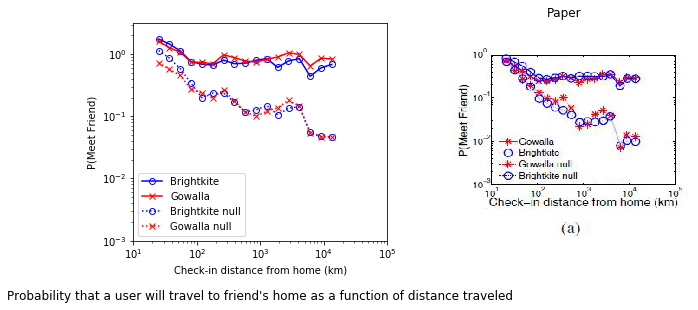

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

#I set the parameter facecolor to none to have empty circle like in the original figure 
ax[0].plot(p_data_b_inter_bins[:-1], p_data_b_vals, marker = 'o', label = 'Brightkite', color = 'b', markerfacecolor = 'none')
ax[0].plot(p_data_g_inter_bins[:-1], p_data_g_vals, marker = 'x', label = 'Gowalla', color = 'r')

ax[0].plot(p_null_b_inter_bins[:-1], p_null_b_vals/10,label = 'Brightkite null', color = 'b', linestyle ='dotted',
           marker = 'o', markerfacecolor = 'none')
ax[0].plot(p_null_g_inter_bins[:-1], p_null_g_vals/10, marker = 'x', label = 'Gowalla null', color = 'r', linestyle ='dotted')

#as in the original figure I set the axis scales to 'log'
ax[0].loglog(True)

#I also set the limits of both axis to correspond to the limits of the original image
ax[0].set_ylim([10**(-3), 10**(0.5)])
ax[0].set_xlim(10**1, 10**5)

ax[0].legend()

#I set the name of the axis
ax[0].set_xlabel('Check-in distance from home (km)')
ax[0].set_ylabel('P(Meet Friend)')

#I set the name of the whole subplot
ax[0].set_title("Probability that a user will travel to friend's home as a function of distance traveled", y=-0.3)

#I plot the original figure next to what I obtained
ax[1].set_title('Paper')
ax[1].set_axis_off()
img = image.imread('fig3a.jpg')
ax[1].imshow(img,aspect="auto")

We can see that the plot does look a lot like the original plot from the paper. We can know proceed on plotting the true figure of the replication, figure 3(b).
Unfortunatly, for a reason that until now I still haven't find an answer, the p_null probability needs to be divided by 10 to look like the figure 3(a) from the paper. That is why for now on the I will stick with `p_null_*_vals/10`. 

## Plot figure 3(b)

To be able to plot this figure, we first need to compute the ratio :
<font size = "5"><center>$\frac{P_{data}}{P_{null}}$</center></font>

In [94]:
# Computing ratio of the distributions
p_ratio_b_vals =  p_data_b_vals/(p_null_b_vals/10)
p_ratio_g_vals =  p_data_g_vals/(p_null_g_vals/10)

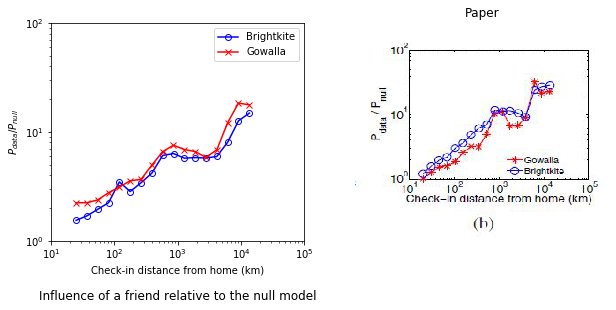

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

#I set the parameter facecolor to none to have empty circle like in the original figure 
ax[0].plot(p_null_b_inter_bins[:-1], p_ratio_b_vals,
              marker = 'o', label = 'Brightkite', color = 'b', markerfacecolor = 'none')
ax[0].plot(p_null_g_inter_bins[:-1], p_ratio_g_vals, marker = 'x', label = 'Gowalla', color = 'r')

#as in the original figure I set the axis scales to 'log'
ax[0].loglog(True)

#I also set the limits of both axis to correspond to the limits of the original image
ax[0].set_ylim([10**(0), 10**(2)])
ax[0].set_xlim(10**1, 10**5)

ax[0].legend()

#I set the name of the axis
ax[0].set_xlabel('Check-in distance from home (km)')
ax[0].set_ylabel('$P_{data}$/$P_{null}$')

#I set the name of the whole subplot
ax[0].set_title("Influence of a friend relative to the null model", y=-0.3)

#I plot the original figure next to what I obtained
ax[1].set_title('Paper')
ax[1].set_axis_off()
img = image.imread('fig3b.jpg')
ax[1].imshow(img,aspect="auto")

### Comments

The plots seems to follow the same shape as the ones from the paper. The differences we can point out between my replication and the paper plot are :
- in my replication, the function for gowalla, between $[10^{1}, 10^{2}]$, the ratio is higher than the ratio for Brigtkite, whereas in the paper plot it is the contrary.
- for the Brigtkite ratio of the paper, between $[10^{1}, 10^{2.5}]$, it looks like a straight line, while in my replication the line is not as straight. There is like a step when my ratio is equal to $10^{5}$.
- when arriving after $10^{3}$, my ratio for the Brightkite dataset seems to follow the same shape than the ratio in the paper, for Gowalla, we clearly see the same decreasing but, unfortunatly, it is not as sharp in my replication as in the paper.
- the rest of the plot seems essentially identical.